In [119]:
import pandas as pd

In [120]:
df1 = pd.read_csv("compas-scores-two-years_cleaned.csv")
df1.head(10)

,id,sex,age,age_cat,race,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,...,decile_score.1,score_text,v_type_of_assessment,v_decile_score,v_score_text,priors_count.1,start,end,event,two_year_recid
0,1,Male,69,Greater than 45,Other,0,1,0,0,0,...,1,Low,Risk of Violence,1,Low,0,0,327,0,0
1,3,Male,34,25 - 45,African-American,0,3,0,0,0,...,3,Low,Risk of Violence,1,Low,0,9,159,1,1
2,4,Male,24,Less than 25,African-American,0,4,0,1,4,...,4,Low,Risk of Violence,3,Low,4,0,63,0,1
3,5,Male,23,Less than 25,African-American,0,8,1,0,1,...,8,High,Risk of Violence,6,Medium,1,0,1174,0,0
4,6,Male,43,25 - 45,Other,0,1,0,0,2,...,1,Low,Risk of Violence,1,Low,2,0,1102,0,0
5,7,Male,44,25 - 45,Other,0,1,0,0,0,...,1,Low,Risk of Violence,1,Low,0,1,853,0,0
6,8,Male,41,25 - 45,Caucasian,0,6,0,0,14,...,6,Medium,Risk of Violence,2,Low,14,5,40,1,1
7,9,Male,43,25 - 45,Other,0,4,0,0,3,...,4,Low,Risk of Violence,3,Low,3,0,265,0,0
8,10,Female,39,25 - 45,Caucasian,0,1,0,0,0,...,1,Low,Risk of Violence,1,Low,0,2,747,0,0
9,13,Male,21,Less than 25,Caucasian,0,3,0,0,1,...,3,Low,Risk of Violence,5,Medium,1,0,428,1,1


In [ ]:
arrestNoCharge = df1.loc[df1['c_charge_desc'] == 'arrest case no charge']

In [ ]:
len(arrestNoCharge)

In [ ]:
charges = df1.groupby('c_charge_desc')['id'].nunique()
charges.sort_values(ascending=True)

In [ ]:
len(df1)

In [ ]:
noNull = df1[df1['c_charge_desc']].dropna()

In [ ]:
# chargesGroup = df1.groupby('c_charge_desc').contains("Possession")
chargesGroup = noNull.loc[noNull['c_charge_desc'].str.contains('Possession')]
chargesGroup

In [ ]:
arrestNoCharge = df1.loc[df1['c_charge_desc'] == 'arrest case no charge']

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import os

## Doing the modelling stuff 

In [121]:
df1 = pd.read_csv("compas-scores-two-years_cleaned.csv")
df1.head(10)

,id,sex,age,age_cat,race,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,...,decile_score.1,score_text,v_type_of_assessment,v_decile_score,v_score_text,priors_count.1,start,end,event,two_year_recid
0,1,Male,69,Greater than 45,Other,0,1,0,0,0,...,1,Low,Risk of Violence,1,Low,0,0,327,0,0
1,3,Male,34,25 - 45,African-American,0,3,0,0,0,...,3,Low,Risk of Violence,1,Low,0,9,159,1,1
2,4,Male,24,Less than 25,African-American,0,4,0,1,4,...,4,Low,Risk of Violence,3,Low,4,0,63,0,1
3,5,Male,23,Less than 25,African-American,0,8,1,0,1,...,8,High,Risk of Violence,6,Medium,1,0,1174,0,0
4,6,Male,43,25 - 45,Other,0,1,0,0,2,...,1,Low,Risk of Violence,1,Low,2,0,1102,0,0
5,7,Male,44,25 - 45,Other,0,1,0,0,0,...,1,Low,Risk of Violence,1,Low,0,1,853,0,0
6,8,Male,41,25 - 45,Caucasian,0,6,0,0,14,...,6,Medium,Risk of Violence,2,Low,14,5,40,1,1
7,9,Male,43,25 - 45,Other,0,4,0,0,3,...,4,Low,Risk of Violence,3,Low,3,0,265,0,0
8,10,Female,39,25 - 45,Caucasian,0,1,0,0,0,...,1,Low,Risk of Violence,1,Low,0,2,747,0,0
9,13,Male,21,Less than 25,Caucasian,0,3,0,0,1,...,3,Low,Risk of Violence,5,Medium,1,0,428,1,1


In [ ]:
for col in df1.columns: 
    print(col) 

In [122]:
smallerDF = df1[['sex', 'age', 'juv_fel_count', 'priors_count', 'two_year_recid']]

In [123]:
smallerDF

,sex,age,juv_fel_count,priors_count,two_year_recid
0,Male,69,0,0,0
1,Male,34,0,0,1
2,Male,24,0,4,1
3,Male,23,0,1,0
4,Male,43,0,2,0
5,Male,44,0,0,0
6,Male,41,0,14,1
7,Male,43,0,3,0
8,Female,39,0,0,0
9,Male,21,0,1,1


In [124]:
smallerDF = pd.get_dummies(smallerDF)
smallerDF.head()

,age,juv_fel_count,priors_count,two_year_recid,sex_Female,sex_Male
0,69,0,0,0,0,1
1,34,0,0,1,0,1
2,24,0,4,1,0,1
3,23,0,1,0,0,1
4,43,0,2,0,0,1


In [125]:
X = smallerDF[['age', 'juv_fel_count', 'priors_count', 'sex_Female', 'sex_Male']]
y = smallerDF['two_year_recid'].values.reshape(-1, 1)
print(X.shape, y.shape)

(7214, 5) (7214, 1)


In [ ]:
y

In [126]:
# Split the data into training and testing

### BEGIN SOLUTION
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
### END SOLUTION

In [127]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

### BEGIN SOLUTION
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)
### END SOLUTION

C:\Users\scott\Anaconda3\envs\pythondata\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\scott\Anaconda3\envs\pythondata\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


## If I don't want it scaled

In [128]:
# Create a LinearRegression model and fit it to the scaled training data

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
### END SOLUTION

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

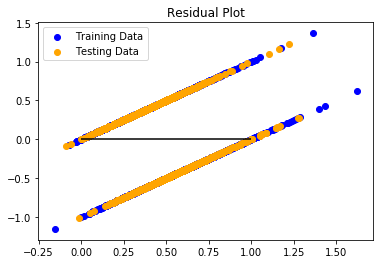

In [129]:
# Make predictions using the X_test_scaled data
# Plot y_test_scaled vs y_test_scaled
# Scatter plot y_test_scaled vs predictions

### BEGIN SOLUTION
predictions = model.predict(X_test)
model.fit(X_train, y_train)
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max())
plt.title("Residual Plot")
plt.show()
### END SOLUTION

In [130]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2

### BEGIN SOLUTION
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test, predictions)
r2 = model.score(X_test, y_test)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.21007015308128815, R2: 0.14432124227255383


In [131]:
# LASSO model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Lasso

### BEGIN SOLUTION
lasso = Lasso(alpha=.01).fit(X_train, y_train)

predictions = lasso.predict(X_test)

MSE = mean_squared_error(y_test, predictions)
r2 = lasso.score(X_test, y_test)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.21094928411450134, R2: 0.14074027782165244


In [132]:
# Ridge model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Ridge

### BEGIN SOLUTION
ridge = Ridge(alpha=.01).fit(X_train, y_train)

predictions = ridge.predict(X_test)

MSE = mean_squared_error(y_test, predictions)
r2 = ridge.score(X_test, y_test)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.21007015433077952, R2: 0.1443212371830006


In [133]:
# ElasticNet model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import ElasticNet

### BEGIN SOLUTION
elasticnet = ElasticNet(alpha=.01).fit(X_train, y_train)

predictions = elasticnet.predict(X_test)

MSE = mean_squared_error(y_test, predictions)
r2 = elasticnet.score(X_test, y_test)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.2103942046630524, R2: 0.14300128295964587


## Scaled

In [134]:
# Transform the training and testing data using the X_scaler and y_scaler models

### BEGIN SOLUTION
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)
### END SOLUTION

C:\Users\scott\Anaconda3\envs\pythondata\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.
C:\Users\scott\Anaconda3\envs\pythondata\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  """
C:\Users\scott\Anaconda3\envs\pythondata\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\scott\Anaconda3\envs\pythondata\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [135]:
# Create a LinearRegression model and fit it to the scaled training data

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
### END SOLUTION

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

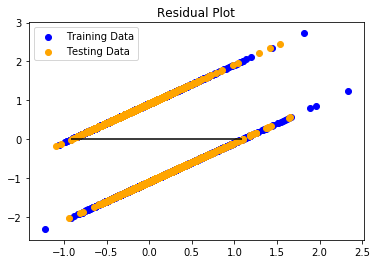

In [136]:
# Make predictions using the X_test_scaled data
# Plot y_test_scaled vs y_test_scaled
# Scatter plot y_test_scaled vs predictions

### BEGIN SOLUTION
predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()
### END SOLUTION

In [137]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2

### BEGIN SOLUTION
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.8466708319422803, R2: 0.14432124227255405


In [138]:
# LASSO model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Lasso

### BEGIN SOLUTION
lasso = Lasso(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = lasso.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = lasso.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.8480992356718429, R2: 0.14287764142706205


In [139]:
# Ridge model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Ridge

### BEGIN SOLUTION
ridge = Ridge(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = ridge.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = ridge.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.8466708814138313, R2: 0.144321192274664


In [140]:
# ElasticNet model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import ElasticNet

### BEGIN SOLUTION
elasticnet = ElasticNet(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = elasticnet.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = elasticnet.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.8474658749877751, R2: 0.14351774058117284


In [141]:
smallDFRace = df1[['sex', 'race', 'age', 'juv_fel_count', 'priors_count', 'two_year_recid']]

In [142]:
smallDFRace = pd.get_dummies(smallDFRace)
smallDFRace.head()

,age,juv_fel_count,priors_count,two_year_recid,sex_Female,sex_Male,race_African-American,race_Asian,race_Caucasian,race_Hispanic,race_Native American,race_Other
0,69,0,0,0,0,1,0,0,0,0,0,1
1,34,0,0,1,0,1,1,0,0,0,0,0
2,24,0,4,1,0,1,1,0,0,0,0,0
3,23,0,1,0,0,1,1,0,0,0,0,0
4,43,0,2,0,0,1,0,0,0,0,0,1


In [143]:
X = smallDFRace[['age', 'juv_fel_count', 'priors_count', 'sex_Female', 'sex_Male', 'race_African-American', 'race_Asian', 'race_Caucasian', 'race_Hispanic', 'race_Native American', 'race_Other']]
y = smallDFRace['two_year_recid'].values.reshape(-1, 1)
print(X.shape, y.shape)

(7214, 11) (7214, 1)


In [144]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


In [145]:
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

C:\Users\scott\Anaconda3\envs\pythondata\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\scott\Anaconda3\envs\pythondata\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [146]:
# Transform the training and testing data using the X_scaler and y_scaler models

### BEGIN SOLUTION
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)
### END SOLUTION

C:\Users\scott\Anaconda3\envs\pythondata\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.
C:\Users\scott\Anaconda3\envs\pythondata\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  """
C:\Users\scott\Anaconda3\envs\pythondata\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\scott\Anaconda3\envs\pythondata\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [147]:
# Create a LinearRegression model and fit it to the scaled training data

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
### END SOLUTION

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

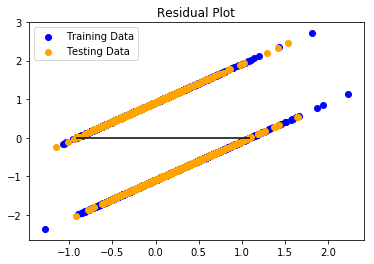

In [148]:
# Make predictions using the X_test_scaled data
# Plot y_test_scaled vs y_test_scaled
# Scatter plot y_test_scaled vs predictions

### BEGIN SOLUTION
predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()
### END SOLUTION

In [149]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2

### BEGIN SOLUTION
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.8435069854404632, R2: 0.1475187496652498


In [150]:
# LASSO model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Lasso

### BEGIN SOLUTION
lasso = Lasso(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = lasso.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = lasso.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.8460415621008344, R2: 0.1449572070606272


## Trying to do the random forest classifier

In [151]:
from sklearn.ensemble import RandomForestClassifier
# from sklearn.datasets import load_iris

In [152]:
X_train_scaled

array([[ 0.01001795, -0.1413594 , -0.50443033, ..., -0.31416595,
        -0.05272904, -0.23052952],
       [ 2.86249787, -0.1413594 , -0.708725  , ..., -0.31416595,
        -0.05272904, -0.23052952],
       [ 0.6811897 , -0.1413594 , -0.708725  , ..., -0.31416595,
        -0.05272904, -0.23052952],
       ...,
       [-0.15777498, -0.1413594 , -0.708725  , ..., -0.31416595,
        -0.05272904, -0.23052952],
       [-0.66115379, -0.1413594 , -0.09584101, ..., -0.31416595,
        -0.05272904, -0.23052952],
       [-0.9128432 , -0.1413594 , -0.50443033, ..., -0.31416595,
        -0.05272904, -0.23052952]])

In [153]:
y_train_scaled

array([[-0.91658936],
       [ 1.0910011 ],
       [-0.91658936],
       ...,
       [-0.91658936],
       [-0.91658936],
       [ 1.0910011 ]])

In [154]:
newData = smallDFRace[['age', 'juv_fel_count', 'priors_count', 'sex_Female', 'sex_Male', 'race_African-American', 'race_Asian', 'race_Caucasian', 'race_Hispanic', 'race_Native American', 'race_Other']]
target = smallDFRace['two_year_recid']
feature_names = smallDFRace.columns

In [155]:
from sklearn.model_selection import train_test_split
from sklearn import tree
import pandas as pd
import os
X_train, X_test, y_train, y_test = train_test_split(newData, target, random_state=42)

In [156]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)
# this is my r2 score

0.6396895787139689

In [157]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.643569844789357

In [158]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.5583105699005284, 'age'),
 (0.34828488817475106, 'priors_count'),
 (0.026671069367267868, 'juv_fel_count'),
 (0.016297254799313852, 'sex_Male'),
 (0.011404239800393344, 'sex_Female'),
 (0.010038215190928347, 'race_Asian'),
 (0.00967420515022374, 'two_year_recid'),
 (0.008169836064914943, 'race_Caucasian'),
 (0.007018313264062678, 'race_Native American'),
 (0.002489040977249438, 'race_African-American'),
 (0.0016423673103665305, 'race_Hispanic')]

## Try to test on just caucasian vs african-american

In [97]:
df1 = pd.read_csv("compas-scores-two-years_cleaned.csv")
df1.head(5)

,id,sex,age,age_cat,race,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,...,decile_score.1,score_text,v_type_of_assessment,v_decile_score,v_score_text,priors_count.1,start,end,event,two_year_recid
0,1,Male,69,Greater than 45,Other,0,1,0,0,0,...,1,Low,Risk of Violence,1,Low,0,0,327,0,0
1,3,Male,34,25 - 45,African-American,0,3,0,0,0,...,3,Low,Risk of Violence,1,Low,0,9,159,1,1
2,4,Male,24,Less than 25,African-American,0,4,0,1,4,...,4,Low,Risk of Violence,3,Low,4,0,63,0,1
3,5,Male,23,Less than 25,African-American,0,8,1,0,1,...,8,High,Risk of Violence,6,Medium,1,0,1174,0,0
4,6,Male,43,25 - 45,Other,0,1,0,0,2,...,1,Low,Risk of Violence,1,Low,2,0,1102,0,0


In [98]:
caucasian = df1.loc[df1['race'] == 'Caucasian']
caucasian

,id,sex,age,age_cat,race,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,...,decile_score.1,score_text,v_type_of_assessment,v_decile_score,v_score_text,priors_count.1,start,end,event,two_year_recid
6,8,Male,41,25 - 45,Caucasian,0,6,0,0,14,...,6,Medium,Risk of Violence,2,Low,14,5,40,1,1
8,10,Female,39,25 - 45,Caucasian,0,1,0,0,0,...,1,Low,Risk of Violence,1,Low,0,2,747,0,0
9,13,Male,21,Less than 25,Caucasian,0,3,0,0,1,...,3,Low,Risk of Violence,5,Medium,1,0,428,1,1
10,14,Male,27,25 - 45,Caucasian,0,4,0,0,0,...,4,Low,Risk of Violence,4,Low,0,0,857,0,0
12,16,Female,37,25 - 45,Caucasian,0,1,0,0,0,...,1,Low,Risk of Violence,1,Low,0,1,1186,0,0
14,19,Female,47,Greater than 45,Caucasian,0,1,0,0,1,...,1,Low,Risk of Violence,1,Low,1,0,216,1,1
18,23,Male,31,25 - 45,Caucasian,0,5,0,0,6,...,5,Medium,Risk of Violence,4,Low,6,0,241,1,1
19,24,Male,31,25 - 45,Caucasian,0,3,0,0,5,...,3,Low,Risk of Violence,2,Low,5,0,163,1,1
22,27,Male,27,25 - 45,Caucasian,0,2,0,0,0,...,2,Low,Risk of Violence,3,Low,0,0,81,1,1
23,28,Female,21,Less than 25,Caucasian,0,4,0,0,0,...,4,Low,Risk of Violence,5,Medium,0,0,861,0,0


In [99]:
caucasian_new = caucasian[['sex', 'race', 'age', 'juv_fel_count', 'priors_count', 'two_year_recid']]
caucasian_new

,sex,race,age,juv_fel_count,priors_count,two_year_recid
6,Male,Caucasian,41,0,14,1
8,Female,Caucasian,39,0,0,0
9,Male,Caucasian,21,0,1,1
10,Male,Caucasian,27,0,0,0
12,Female,Caucasian,37,0,0,0
14,Female,Caucasian,47,0,1,1
18,Male,Caucasian,31,0,6,1
19,Male,Caucasian,31,0,5,1
22,Male,Caucasian,27,0,0,1
23,Female,Caucasian,21,0,0,0


In [100]:
caucasian_DF = pd.get_dummies(caucasian_new)
caucasian_DF.head(20)

,age,juv_fel_count,priors_count,two_year_recid,sex_Female,sex_Male,race_Caucasian
6,41,0,14,1,0,1,1
8,39,0,0,0,1,0,1
9,21,0,1,1,0,1,1
10,27,0,0,0,0,1,1
12,37,0,0,0,1,0,1
14,47,0,1,1,1,0,1
18,31,0,6,1,0,1,1
19,31,0,5,1,0,1,1
22,27,0,0,1,0,1,1
23,21,0,0,0,1,0,1


In [101]:
X = caucasian_DF[['age', 'juv_fel_count', 'priors_count', 'sex_Female', 'sex_Male']]
y = caucasian_DF['two_year_recid'].values.reshape(-1, 1)
print(X.shape, y.shape)

(2454, 5) (2454, 1)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import tree
import pandas as pd
import os
X_train, X_test, y_train, y_test = train_test_split(newData, target, random_state=42)

In [ ]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)
# this is my r2 score

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

## A-A

In [102]:
african_american = df1.loc[df1['race'] == 'African-American']
african_american

,id,sex,age,age_cat,race,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,...,decile_score.1,score_text,v_type_of_assessment,v_decile_score,v_score_text,priors_count.1,start,end,event,two_year_recid
1,3,Male,34,25 - 45,African-American,0,3,0,0,0,...,3,Low,Risk of Violence,1,Low,0,9,159,1,1
2,4,Male,24,Less than 25,African-American,0,4,0,1,4,...,4,Low,Risk of Violence,3,Low,4,0,63,0,1
3,5,Male,23,Less than 25,African-American,0,8,1,0,1,...,8,High,Risk of Violence,6,Medium,1,0,1174,0,0
11,15,Male,23,Less than 25,African-American,0,6,0,0,3,...,6,Medium,Risk of Violence,4,Low,3,4,128,1,1
13,18,Male,41,25 - 45,African-American,0,4,0,0,0,...,4,Low,Risk of Violence,2,Low,0,0,905,0,0
15,20,Male,31,25 - 45,African-American,0,3,0,0,7,...,3,Low,Risk of Violence,2,Low,7,0,22,1,1
17,22,Male,25,25 - 45,African-American,0,10,0,0,3,...,10,High,Risk of Violence,9,High,3,0,463,0,0
20,25,Male,64,Greater than 45,African-American,0,6,0,0,13,...,6,Medium,Risk of Violence,3,Low,13,0,1,1,1
21,26,Male,21,Less than 25,African-American,0,9,0,0,1,...,9,High,Risk of Violence,9,High,1,2,30,1,1
27,37,Male,27,25 - 45,African-American,0,3,0,0,8,...,3,Low,Risk of Violence,3,Low,8,16,116,0,1


In [103]:
african_american_new = african_american[['sex', 'race', 'age', 'juv_fel_count', 'priors_count', 'two_year_recid']]
african_american_new

,sex,race,age,juv_fel_count,priors_count,two_year_recid
1,Male,African-American,34,0,0,1
2,Male,African-American,24,0,4,1
3,Male,African-American,23,0,1,0
11,Male,African-American,23,0,3,1
13,Male,African-American,41,0,0,0
15,Male,African-American,31,0,7,1
17,Male,African-American,25,0,3,0
20,Male,African-American,64,0,13,1
21,Male,African-American,21,0,1,1
27,Male,African-American,27,0,8,1


In [104]:
african_americanDF = pd.get_dummies(african_american_new)
african_americanDF.head(20)

,age,juv_fel_count,priors_count,two_year_recid,sex_Female,sex_Male,race_African-American
1,34,0,0,1,0,1,1
2,24,0,4,1,0,1,1
3,23,0,1,0,0,1,1
11,23,0,3,1,0,1,1
13,41,0,0,0,0,1,1
15,31,0,7,1,0,1,1
17,25,0,3,0,0,1,1
20,64,0,13,1,0,1,1
21,21,0,1,1,0,1,1
27,27,0,8,1,0,1,1


In [105]:
X = african_americanDF[['age', 'juv_fel_count', 'priors_count', 'sex_Female', 'sex_Male']]
y = african_americanDF['two_year_recid'].values.reshape(-1, 1)
print(X.shape, y.shape)

(3696, 5) (3696, 1)


## Trying to train / test just by grabbing train from caucasian and test by a-a

In [106]:
X_train = caucasian_DF[['age', 'juv_fel_count', 'priors_count', 'sex_Female', 'sex_Male']]
y_train = caucasian_DF['two_year_recid'].values.reshape(-1, 1)

In [107]:
X_test = african_americanDF[['age', 'juv_fel_count', 'priors_count', 'sex_Female', 'sex_Male']]
y_test = african_americanDF['two_year_recid'].values.reshape(-1, 1)

In [108]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.5946969696969697

In [116]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

C:\Users\scott\Anaconda3\envs\pythondata\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.6093073593073594

In [110]:
# Create a LinearRegression model and fit it to the scaled training data

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
### END SOLUTION

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

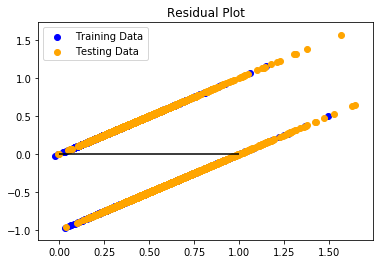

In [111]:
# Make predictions using the X_test_scaled data
# Plot y_test_scaled vs y_test_scaled
# Scatter plot y_test_scaled vs predictions

### BEGIN SOLUTION
predictions = model.predict(X_test)
model.fit(X_train, y_train)
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max())
plt.title("Residual Plot")
plt.show()
### END SOLUTION

In [112]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2

### BEGIN SOLUTION
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test, predictions)
r2 = model.score(X_test, y_test)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.22276078806027802, R2: 0.10822334136080536


In [113]:
# LASSO model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Lasso

### BEGIN SOLUTION
lasso = Lasso(alpha=.01).fit(X_train, y_train)

predictions = lasso.predict(X_test)

MSE = mean_squared_error(y_test, predictions)
r2 = lasso.score(X_test, y_test)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.22355178849384702, R2: 0.10505673502145518


In [114]:
# Ridge model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Ridge

### BEGIN SOLUTION
ridge = Ridge(alpha=.01).fit(X_train, y_train)

predictions = ridge.predict(X_test)

MSE = mean_squared_error(y_test, predictions)
r2 = ridge.score(X_test, y_test)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.22276079532988388, R2: 0.1082233122584445


In [115]:
# ElasticNet model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import ElasticNet

### BEGIN SOLUTION
elasticnet = ElasticNet(alpha=.01).fit(X_train, y_train)

predictions = elasticnet.predict(X_test)

MSE = mean_squared_error(y_test, predictions)
r2 = elasticnet.score(X_test, y_test)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.22361198233161114, R2: 0.10481576146421745
